# ANN IMPLEMENTATION

In [2]:
#importing the original dataset
import pandas as pd
df = pd.read_csv('C:/Users/HP/OneDrive/Documents/Post_Grad/Semester_2/Machine_Learning/Data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# We will not require RowNumber, CustomerId and Surname as it adds no value to the statistical analysis
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# understanding the number of rows and columns we are working with
df.shape

(10000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## DATA PROCESSING

In [6]:
#understanding the distribution male and females in the dataset
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
# converting the string categorical value of the Gender column to numeric categorical values to include the information in further processing
# the conversion will be done using LabelEncoder because there are only two value in the categorical column. 
# We will have to drop one of the columns created with OneHotEncoding which will be equivalent to using LabelENcoder

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# converting the Geography categorical values to numeric categorical values
# the conversion will be done with One Hot Encoder
# We will therefore see the number of columns increase

oneHotEncodingData = pd.get_dummies(df['Geography'])
df = df.drop('Geography', axis = 1)
df = df.join(oneHotEncodingData)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
df.shape

(10000, 13)

In [10]:
# Seperating the target attribute from the independent attributes
X = df.drop('Exited', axis = 1)
Y = df['Exited']

In [11]:
# splitting the target and independent attributes to create the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
# scaling the independent values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ANN IMPLEMENTATION

In [14]:
#importing necessary packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
classifier = Sequential()

In [16]:
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform',input_dim=12))

In [17]:
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

In [18]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5328 - accuracy: 0.7415
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8076
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4251 - accuracy: 0.8174
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.8257
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3970 - accuracy: 0.8334
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3839 - accuracy: 0.8428
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3724 - accuracy: 0.8475
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8514
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3572 - accuracy: 0.8546
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3530 - accura

In [20]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

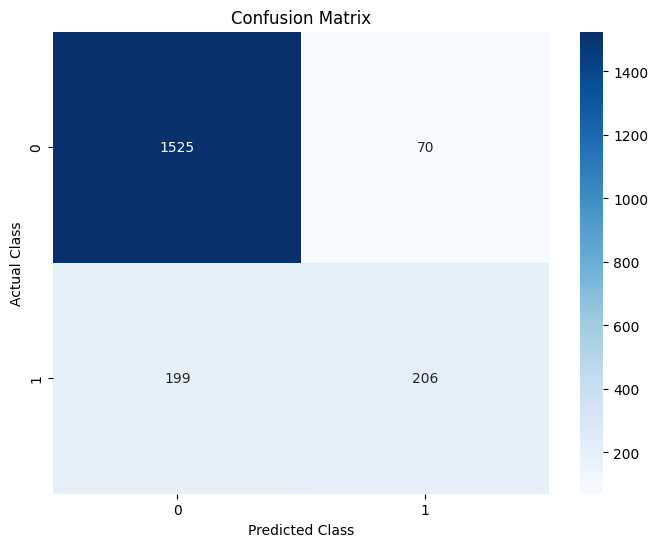

In [22]:
confusion_mat = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()